# Data Analysis

### Features explanation

* Popularity: 0 = not popular, 100 = maximum popularity

* Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* Key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

* Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 

* Mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

* Speechiness: 	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* Tempo: The overall estimated tempo of a track in beats per minute (BPM).

* Time signature: 	An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

* Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [96]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [97]:
import warnings
warnings.filterwarnings('ignore')

In [98]:
# Import models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [99]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Data import and initial analysis

In [100]:
all_tracks = pd.read_csv('../exported_data/all_tracks.csv',index_col=0)

In [101]:
all_tracks.head()

,artist_name,track_name,track_id,popularity,like,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Kyle Landry,Howl's Moving Castle Theme,3JTjiMAPVMfwjzPiG5R3hK,53,1,0.940,0.322,350348,0.1440,0.917,7,0.0744,-17.448,0,0.0384,142.818,3,0.0471
1,Kyle Landry,Shigatsu - Otouto Mitai Na Sonzai Piano,5tr1bCo0XRU3ZciXahlTKm,46,1,0.967,0.368,302336,0.1240,0.803,3,0.1820,-21.851,1,0.0513,138.910,4,0.1040
2,Kyle Landry,"Passion (From ""Kingdom Hearts II"") [Piano Solo]",2xFBrGSZ4mSURd8p5IU4ed,46,1,0.964,0.406,274656,0.1300,0.870,1,0.0964,-20.320,0,0.0515,116.005,4,0.0975
3,Kyle Landry,Dango Daikazoku,7c6mInVLlpnaYD55R72FDX,44,1,0.976,0.384,310974,0.0400,0.896,8,0.0943,-23.524,1,0.0357,95.854,4,0.1000
4,Kyle Landry,Interstellar - First Step,0kznmyiS92b9v1rkn9WDqV,40,1,0.961,0.232,508622,0.0651,0.930,9,0.0607,-21.866,0,0.0387,74.750,3,0.0372


In [102]:
# Change order of columns

all_tracks = all_tracks[['artist_name', 'track_name', 'track_id', 'like', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]

In [103]:
all_tracks.describe()

,like,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,9946.000000,9946.000000,9946.000000,9946.000000,9.946000e+03,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000
mean,0.682787,32.089885,0.225264,0.535818,2.569527e+05,0.706435,0.240325,5.291474,0.193496,-7.656509,0.615926,0.079058,123.366174,3.893022,0.481969
std,0.465415,22.375950,0.305017,0.180299,1.200470e+05,0.242276,0.357317,3.546998,0.157984,4.967066,0.486400,0.069743,29.926641,0.446896,0.257662
min,0.000000,0.000000,0.000001,0.000000,3.500000e+03,0.000020,0.000000,0.000000,0.000000,-41.816000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13.000000,0.002842,0.403000,1.950000e+05,0.588000,0.000000,2.000000,0.094500,-8.872000,0.000000,0.038500,99.968500,4.000000,0.273000
50%,1.000000,32.000000,0.064500,0.538500,2.300145e+05,0.770000,0.000900,5.000000,0.127000,-6.170000,1.000000,0.052800,120.600500,4.000000,0.479000
75%,1.000000,48.000000,0.347000,0.678000,2.865892e+05,0.896000,0.568750,8.000000,0.260000,-4.589250,1.000000,0.089775,141.944000,4.000000,0.690000
max,1.000000,100.000000,0.996000,0.966000,2.025224e+06,0.999000,0.995000,11.000000,0.988000,-0.528000,1.000000,0.883000,220.121000,5.000000,0.984000


In [104]:
# Check if there are NaNs in the dataframe
all_tracks.isna().sum().any()

False

In [105]:
# Check that all datatypes are correct
all_tracks.dtypes

artist_name          object
track_name           object
track_id             object
like                  int64
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object

### Data visualization

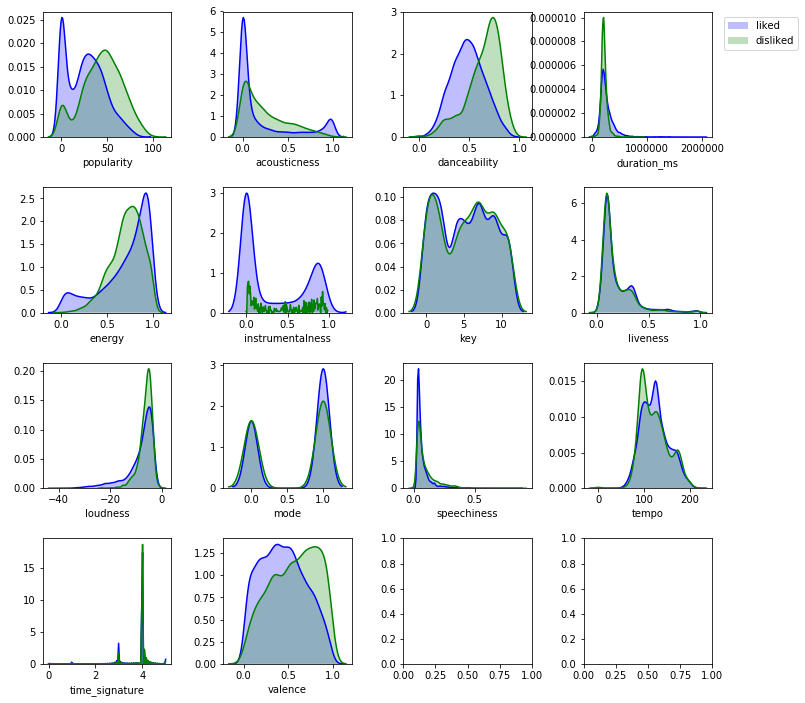

In [106]:
# Create plots for every feature distinguishing between liked and disliked songs

f, ax = plt.subplots(4,4,figsize=(12,12))

cols = [col for col in all_tracks.columns][4:]

plt.subplots_adjust(wspace=0.4,hspace=0.4)

i = 0
for row in ax:
    for col in row:
        if i == 14:
            break
        else:
            sns.distplot(all_tracks[all_tracks['like']==1][cols[i]],hist=False,kde_kws={"shade": True},ax=col,color='blue')
            sns.distplot(all_tracks[all_tracks['like']==0][cols[i]],hist=False,kde_kws={"shade": True},ax=col,color='green')
            i += 1

ax[0][3].legend(['liked','disliked'],bbox_to_anchor=(1.05, 1), loc=2)

In [107]:
# OBSERVATIONS

# In general terms, the songs that I liked are less popular, less danceable, and less happy than the ones that I disliked.
# Therefore, it might be that these features are more determining in the classification algorithm
# The rest of the features don't seem to be really different, on average, between liked and disliked songs.

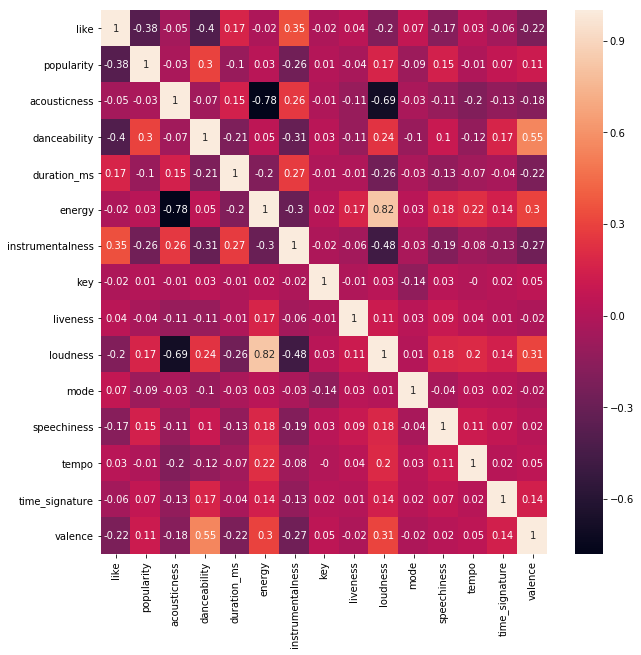

In [108]:
plt.figure(figsize=(10,10))
sns.heatmap(round(all_tracks.corr(),2),annot=True)

In [109]:
# OBSERVATIONS

# The correlation matrix confirms what is observed with the distplots: the like ratio seems presents a slightly negative
# correlation with popularity and danceabilty, and slightly positive with instrumentalness.

# As for the relationships among song features, there is a clear negative correlation between acousticness and energy
# and loudness (which are correlated with each other)
# In addition, danceability seems to be moderately correlated with valence.

### Graphs for presentation

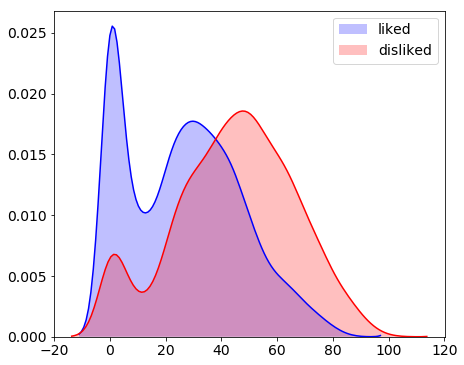

In [110]:
plt.figure(figsize=(7,6))
sns.distplot(all_tracks[all_tracks['like']==1]['popularity'],hist=False,kde_kws={"shade": True},color='b')
sns.distplot(all_tracks[all_tracks['like']==0]['popularity'],hist=False,kde_kws={"shade": True},color='r')
plt.tick_params(labelsize=14)
plt.xlabel('')
plt.legend(['liked','disliked'], prop={'size': 14})
plt.savefig('popularity.png')

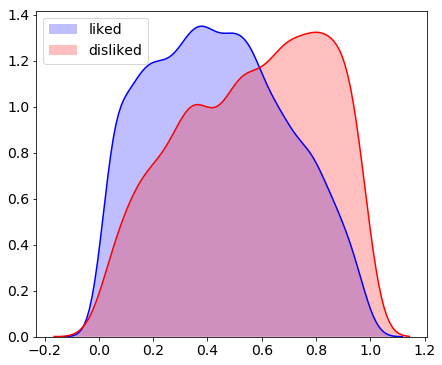

In [111]:
plt.figure(figsize=(7,6))
sns.distplot(all_tracks[all_tracks['like']==1]['valence'],hist=False,kde_kws={"shade": True},color='b')
sns.distplot(all_tracks[all_tracks['like']==0]['valence'],hist=False,kde_kws={"shade": True},color='r')
plt.tick_params(labelsize=14)
plt.xlabel('')
plt.legend(['liked','disliked'], prop={'size': 14})
plt.savefig('valence.png')

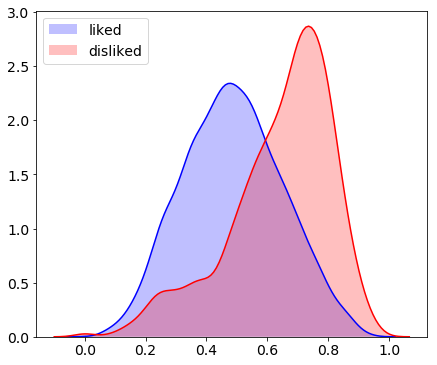

In [112]:
plt.figure(figsize=(7,6))
sns.distplot(all_tracks[all_tracks['like']==1]['danceability'],hist=False,kde_kws={"shade": True},color='b')
sns.distplot(all_tracks[all_tracks['like']==0]['danceability'],hist=False,kde_kws={"shade": True},color='r')
plt.tick_params(labelsize=14)
plt.xlabel('')
plt.legend(['liked','disliked'], prop={'size': 14})
plt.savefig('danceability.png')

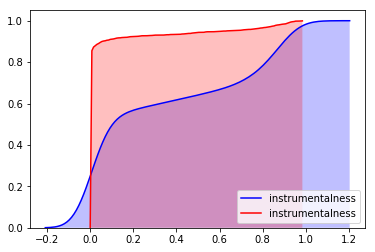

In [113]:
# Graph for instrumentalness is done differently since kernel not drawing properly for class = 0
sns.kdeplot(all_tracks[all_tracks['like']==1]['instrumentalness'],color='b',shade=True,kernel='gau',cumulative=True)
sns.kdeplot(all_tracks[all_tracks['like']==0]['instrumentalness'],color='r',shade=True,kernel='gau',cumulative=True)

### Statistical analysis

### <font color='red'>IN ALL THE ANALYSES FROM HERE ON, WHEN THE FEATURES ARE USED THEY WILL ONLY INCLUDE:  popularity, acousticness, danceability, energy, instrumentalness, liveness, mode, speechiness and valence</font>

In [114]:
# *** IN ALL THE ANALYSES FROM HERE ON, WHEN THE FEATURES ARE USED THEY WILL REFERRING TO THESE ***

# From previous analyses, the tempo, key and duration were observed to have a very small impact on the ML model.
# Therefore, they have not been included in the features for the sake of simplification.
# In addition, the loudness is highly correlated with energy. Hence, it has also been dropped from the features.

features = ['popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'mode', 'speechiness', 'valence']

In [115]:
from scipy import stats

In [116]:
def features_tests(df, features):
    '''Prints the mean and standard deviation for liked and disliked tracks of several features, as well as the summary
    of several t-test applied to these features
    
    Input:
    --------------
    df (DataFrame): Dataframe containing tracks information and features
    features (list): list of the features to be analyzed
    '''
    liked = df[df['like']==1]
    disliked = df[df['like']==0]
    
    for feature in features:
        
        feat_liked = liked[feature]
        feat_disliked = disliked[feature]
        
        print(f'{feature} of liked songs: {round(np.mean(feat_liked),2)} +- {round(np.std(feat_liked),2)}')
        print(f'{feature} of disliked songs: {round(np.mean(feat_disliked),2)} +- {round(np.std(feat_disliked),2)}')
        
        test = stats.ttest_ind(feat_liked, feat_disliked, equal_var=False)

        print(f'Test statistic: {round(test[0],2)}, p-value: {test[1]}')

        print('-' * 40)

In [117]:
features_tests(all_tracks, features)

popularity of liked songs: 26.31 +- 20.3
popularity of disliked songs: 44.54 +- 21.55
Test statistic: -39.98, p-value: 3.731775355106535e-309
----------------------------------------
acousticness of liked songs: 0.22 +- 0.33
acousticness of disliked songs: 0.25 +- 0.24
Test statistic: -5.35, p-value: 8.926414765625478e-08
----------------------------------------
danceability of liked songs: 0.49 +- 0.16
danceability of disliked songs: 0.64 +- 0.17
Test statistic: -43.31, p-value: 0.0
----------------------------------------
energy of liked songs: 0.7 +- 0.27
energy of disliked songs: 0.72 +- 0.17
Test statistic: -2.84, p-value: 0.00448146035737594
----------------------------------------
instrumentalness of liked songs: 0.33 +- 0.38
instrumentalness of disliked songs: 0.06 +- 0.19
Test statistic: 46.74, p-value: 0.0
----------------------------------------
liveness of liked songs: 0.2 +- 0.16
liveness of disliked songs: 0.19 +- 0.15
Test statistic: 3.58, p-value: 0.0003520244981787295


In [118]:
# There is a significant difference between liked and disliked songs for all the parameters:
# on average, the songs that I liked are less popular, less danceable, more instrumental, less loud, 
# and with smaller valence (i.e. less happy ).

### Data pre-processing

In [119]:
def scaling(df):
    '''Returns a dataframe with scaled features.
       
    Input:
    --------------
    df (df): dataframe without all features scaled
    
    Returns:
    --------------
    df (df): dataframe with all features scaled
    '''
    
    df['popularity'] = df['popularity'] / 100

    return df

In [120]:
all_tracks = scaling(all_tracks)

In [121]:
all_tracks.head()

,artist_name,track_name,track_id,like,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Kyle Landry,Howl's Moving Castle Theme,3JTjiMAPVMfwjzPiG5R3hK,1,0.53,0.940,0.322,350348,0.1440,0.917,7,0.0744,-17.448,0,0.0384,142.818,3,0.0471
1,Kyle Landry,Shigatsu - Otouto Mitai Na Sonzai Piano,5tr1bCo0XRU3ZciXahlTKm,1,0.46,0.967,0.368,302336,0.1240,0.803,3,0.1820,-21.851,1,0.0513,138.910,4,0.1040
2,Kyle Landry,"Passion (From ""Kingdom Hearts II"") [Piano Solo]",2xFBrGSZ4mSURd8p5IU4ed,1,0.46,0.964,0.406,274656,0.1300,0.870,1,0.0964,-20.320,0,0.0515,116.005,4,0.0975
3,Kyle Landry,Dango Daikazoku,7c6mInVLlpnaYD55R72FDX,1,0.44,0.976,0.384,310974,0.0400,0.896,8,0.0943,-23.524,1,0.0357,95.854,4,0.1000
4,Kyle Landry,Interstellar - First Step,0kznmyiS92b9v1rkn9WDqV,1,0.40,0.961,0.232,508622,0.0651,0.930,9,0.0607,-21.866,0,0.0387,74.750,3,0.0372


In [122]:
def under_sample(df):
    '''Applies under-sampling to a dataframe with imbalanced classes (class 0 << class 1)
    
    Input:
    --------------
    df: dataframe with imbalanced classes 
    
    Returns:
    --------------
    df: dataframe with balanced classes
    '''
    
    df_class_0 = df[df['like']==0]
    df_class_1 = df[df['like']==1]
    
    df_class_1_under = df_class_1.sample(df_class_0.shape[0])
    
    df_under = pd.concat([df_class_0,df_class_1_under],axis=0)
    
    return df_under

In [123]:
all_under = under_sample(all_tracks)

In [124]:
all_under.shape

(6310, 18)

In [125]:
def over_sample(df):
    '''Applies over-sampling to a dataframe with imbalanced classes (class 0 << class 1)
    
    Input:
    --------------
    df: dataframe with imbalanced classes 
    
    Returns:
    --------------
    df: dataframe with balanced classes
    '''
    
    df_class_0 = df[df['like']==0]
    df_class_1 = df[df['like']==1]
    
    df_class_0_over = df_class_0.sample(df_class_1.shape[0],replace=True)
    
    df_over = pd.concat([df_class_0_over,df_class_1],axis=0)
    
    return df_over

In [126]:
all_over = over_sample(all_tracks)

In [127]:
all_over.shape

(13582, 18)

# Machine learning

### Overview of classification models performance with cross-validation

In [128]:
def cross_validation(X,y,n):
    '''Runs cross-validation on five classification models and prints the results (mean and standard deviation).
    
    Input:
    --------------
    X: dataframe of features
    y: target
    n: number of splits in cross-validation
    '''
    
    cv_log = cross_val_score(LogisticRegression(),X,y,cv=n)
    cv_svc = cross_val_score(SVC(),X,y,cv=n)
    cv_knn = cross_val_score(KNeighborsClassifier(),X,y,cv=n)
    cv_tree = cross_val_score(DecisionTreeClassifier(),X,y,cv=n)
    cv_forest = cross_val_score(RandomForestClassifier(),X,y,cv=n)
    
    print('Logistic regression --> Mean:', round(np.mean(cv_log),2), '/ Std.:', round(np.std(cv_log),2))
    print('SVC --> Mean:', round(np.mean(cv_svc),2), '/ Std.:', round(np.std(cv_svc),2))
    print('KNN --> Mean:', round(np.mean(cv_knn),2), '/ Std.:', round(np.std(cv_knn),2))
    print('Decision tree --> Mean:', round(np.mean(cv_tree),2), '/ Std.:', round(np.std(cv_tree),2))
    print('Random forest --> Mean:', round(np.mean(cv_forest),2), '/ Std.:', round(np.std(cv_forest),2))

#### With no re-sampling strategies

In [129]:
# NOTE: when cross_val_score is used, with integer/None inputs, if the estimator is a classifier and y is either 
# binary or multiclass, StratifiedKFold is used. Otherwise, Kfolds is used.

In [130]:
X = all_tracks[features]
y = all_tracks['like']
cross_validation(X,y,10)

Logistic regression --> Mean: 0.79 / Std.: 0.09
SVC --> Mean: 0.81 / Std.: 0.09
KNN --> Mean: 0.8 / Std.: 0.08
Decision tree --> Mean: 0.77 / Std.: 0.05
Random forest --> Mean: 0.83 / Std.: 0.07


In [131]:
# Conclusions:

# With the default parameters, the Random Forest has the best performance

#### With under-sampling

In [132]:
X = all_under[features]
y = all_under['like']
cross_validation(X,y,10)

Logistic regression --> Mean: 0.78 / Std.: 0.11
SVC --> Mean: 0.81 / Std.: 0.11
KNN --> Mean: 0.79 / Std.: 0.1
Decision tree --> Mean: 0.77 / Std.: 0.07
Random forest --> Mean: 0.82 / Std.: 0.08


In [133]:
# The results are very similar as when no re-sampling was performed

#### With over-sampling

In [134]:
X = all_over[features]
y = all_over['like']
cross_validation(X,y,5)

Logistic regression --> Mean: 0.77 / Std.: 0.05
SVC --> Mean: 0.81 / Std.: 0.04
KNN --> Mean: 0.84 / Std.: 0.03
Decision tree --> Mean: 0.89 / Std.: 0.02
Random forest --> Mean: 0.91 / Std.: 0.03


In [135]:
# The results with over-sampling improve significantly for the decision tree and random forest

# From now on, for simplicity, we will keep working with the decision tree since it's more simple than the random forest
# and delivers very similar results.

### Check random forest without cross-validation and different sampling strategies

#### Without re-sampling

In [136]:
X = all_tracks[features]
y = all_tracks['like']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [137]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [138]:
y_pred = dtc.predict(X_test)

In [139]:
accuracy_score(y_test,y_pred)

0.8153485254691689

In [140]:
confusion_matrix(y_test,y_pred)

array([[ 661,  257],
       [ 294, 1772]], dtype=int64)

#### With under-sampling

In [141]:
X = all_under[features]
y = all_under['like']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [142]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [143]:
y_pred = dtc.predict(X_test)

In [144]:
accuracy_score(y_test,y_pred)

0.7939778129952456

In [145]:
confusion_matrix(y_test,y_pred)

array([[753, 216],
       [174, 750]], dtype=int64)

#### With over-sampling

In [146]:
X = all_over[features]
y = all_over['like']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [147]:
dtc = RandomForestClassifier()
dtc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [148]:
y_pred = dtc.predict(X_test)

In [149]:
accuracy_score(y_test,y_pred)

0.9155828220858896

In [150]:
confusion_matrix(y_test,y_pred)

array([[1965,   84],
       [ 260, 1766]], dtype=int64)

In [151]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2049
           1       0.95      0.87      0.91      2026

   micro avg       0.92      0.92      0.92      4075
   macro avg       0.92      0.92      0.92      4075
weighted avg       0.92      0.92      0.92      4075



In [154]:
# Notes:
#       0     1
# 0  [[1965, 84],
#      (TN) (FP)
# 1  [260, 1766]]
#      (FN) (TP)

# Precision: TP / (TP + FP) 
    # For class 0: 1965 / (1965 + 260) = 0.88
    # For class 1: 1766 / (1766 + 84) = 0.95
    
# Recall/sensitivity: TP/ (TP + FN)
    # For class 0: 1965 / (1965 + 84) = 0.96
    # For class 1: 1766 / (1766 + 260) = 0.87

In [155]:
# Conclusions

# The model classifies performs pretty well, classifying 92% of the songs correctly.

# However, it has a hard 

### MODEL OPTIMIZATION

In [156]:
# Notes

# max_depth: maximum depth of the tree (by default, nodes expand untill all leaves are pure or leaves < min_samples_split)
# min_samples_split: minimum number of samples to split a node (2 by default)
# min_samples_leaf: minimum number of samples required at a leaf node (1 by default)
# max_features: number of features to consider when looking for the best split (by default, the sqrt of number of features)

In [157]:
# CHECKING BEST PARAMETER COMBINATION FOR DECISION TREE CLASSIFIER

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()

X = all_over[features]
y = all_over['like']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Parameters to try
parameter_grid = {'max_depth':list(range(4,16)),
                  'min_samples_split':list(range(2,10)),
                  'max_features':list(range(2,10))}
                  
# Instantiate stratified cross validation
cross_validation = StratifiedKFold(n_splits=5)

# Create grid search object
grid_search = GridSearchCV(dtc,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           n_jobs=-1)

# Fit model with grid_search
grid_search.fit(X_train, y_train) # uses train data from previous over sampling
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8840854107499737
Best parameters: {'max_depth': 14, 'max_features': 8, 'min_samples_split': 2}


In [169]:
# In the end, the grid search with the input parameters lead to worse results (or almost the same) than the default ones,
# therefore, the default values for the model will be left.

### Run final model with best parameters

In [170]:
X = all_over[features]
y = all_over['like']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [171]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

In [172]:
accuracy_score(y_test,y_pred)

0.9045398773006135

In [173]:
cm = confusion_matrix(y_test,y_pred)

In [174]:
cm

array([[1918,  131],
       [ 258, 1768]], dtype=int64)

In [175]:
index = ['Disliked','Liked']
pd.DataFrame(cm,columns=['Disliked','Liked'],index=index)

,Disliked,Liked
Disliked,1918,131
Liked,258,1768


In [176]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2049
           1       0.93      0.87      0.90      2026

   micro avg       0.90      0.90      0.90      4075
   macro avg       0.91      0.90      0.90      4075
weighted avg       0.91      0.90      0.90      4075



In [165]:
importances = pd.DataFrame(dtc.feature_importances_,index=X.columns,columns=['importances']).sort_values(by=['importances'],ascending=False)

In [166]:
importances

,importances
instrumentalness,0.231422
danceability,0.206027
acousticness,0.190200
popularity,0.116369
energy,0.074033
speechiness,0.070418
valence,0.062395
liveness,0.045159
mode,0.003978


In [84]:
import io

In [85]:
from sklearn.tree import export_graphviz

In [86]:
import pydotplus

In [28]:
import imageio

In [29]:
def showtree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f,feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread( path )
    plt.rcParams['figure.figsize'] = (20,20)
    plt.imshow(img)

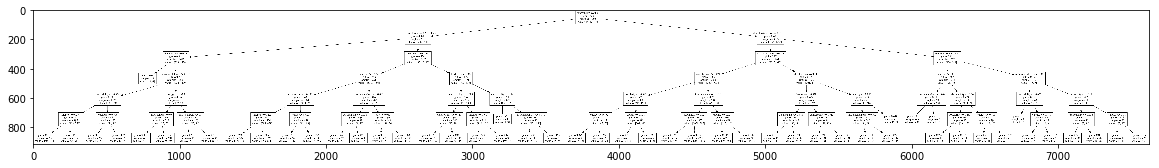

In [34]:
showtree(dtc,features,'dt_02.png')

In [79]:
# As it has been already observed with the visualization and statisical analysis, the features that are most determinant
# when classifying a track are instrumentalness, danceability, popularity, loudness, and valence. There are other parameters
# also classified as important such as acousticness and energy which were not seen as important in the previous analysis.

In [167]:
from sklearn.externals import joblib

In [177]:
# Save model to disk
filename = 'tree_model.sav'
joblib.dump(dtc, filename)

['tree_model.sav']